2x2 topology:
  alpha (latency)        = 3.474e-05 s
  beta  (inv bandwidth)  = 1.866e-10 s/byte
  Bandwidth              = 5.36 GB/s

4x1 topology:
  alpha (latency)        = 1.685e-05 s
  beta  (inv bandwidth)  = 2.558e-10 s/byte
  Bandwidth              = 3.91 GB/s


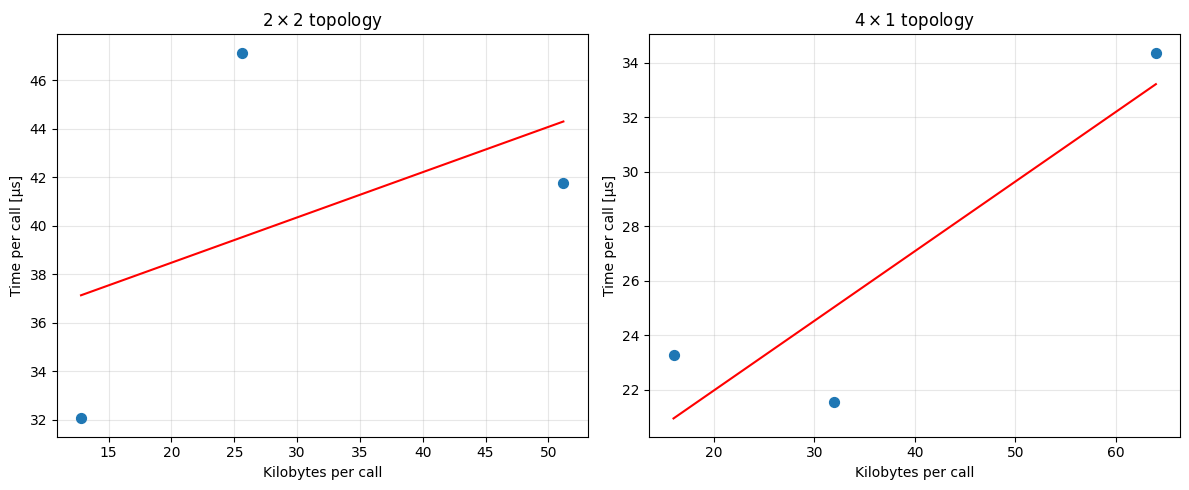

In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 2x2 topology
files_2x2 = [
    "output_t2x2_g200x200.log",
    "output_t2x2_g400x400.log",
    "output_t2x2_g800x800.log",
]

bytes_per_call_2x2 = []
time_per_call_2x2 = []

for fname in files_2x2:
    with open(fname) as f:
        txt = f.read()
    total_time = float(re.search(r"Total Exchange_Borders time:\s*([\d.]+)", txt).group(1))
    total_bytes = float(re.search(r"Total data communicated:\s*(\d+)", txt).group(1))
    n_calls = 2 * int(re.search(r"Number of iterations\s*:\s*(\d+)", txt).group(1))
    bytes_per_call_2x2.append(total_bytes / n_calls)
    time_per_call_2x2.append(total_time / n_calls)

x_2x2 = np.array(bytes_per_call_2x2)
y_2x2 = np.array(time_per_call_2x2)
beta_2x2, alpha_2x2 = np.polyfit(x_2x2, y_2x2, 1)

print("2x2 topology:")
print(f"  alpha (latency)        = {alpha_2x2:.3e} s")
print(f"  beta  (inv bandwidth)  = {beta_2x2:.3e} s/byte")
print(f"  Bandwidth              = {1/beta_2x2/1e9:.2f} GB/s")
print()

# 4x1 topology
files_4x1 = [
    "output_t4x1_g200x200.log",
    "output_t4x1_g400x400.log",
    "output_t4x1_g800x800.log",
]

bytes_per_call_4x1 = []
time_per_call_4x1 = []

for fname in files_4x1:
    with open(fname) as f:
        txt = f.read()
    total_time = float(re.search(r"Total Exchange_Borders time:\s*([\d.]+)", txt).group(1))
    total_bytes = float(re.search(r"Total data communicated:\s*(\d+)", txt).group(1))
    n_calls = 2 * int(re.search(r"Number of iterations\s*:\s*(\d+)", txt).group(1))
    bytes_per_call_4x1.append(total_bytes / n_calls)
    time_per_call_4x1.append(total_time / n_calls)

x_4x1 = np.array(bytes_per_call_4x1)
y_4x1 = np.array(time_per_call_4x1)
beta_4x1, alpha_4x1 = np.polyfit(x_4x1, y_4x1, 1)

print("4x1 topology:")
print(f"  alpha (latency)        = {alpha_4x1:.3e} s")
print(f"  beta  (inv bandwidth)  = {beta_4x1:.3e} s/byte")
print(f"  Bandwidth              = {1/beta_4x1/1e9:.2f} GB/s")

# Plot 2x2
ax = axes[0]
x_fit = np.linspace(x_2x2.min(), x_2x2.max(), 100)
ax.scatter(x_2x2 / 1e3, y_2x2 * 1e6, s=50, zorder=5, label="Measurements")
ax.plot(x_fit / 1e3, (alpha_2x2 + beta_2x2 * x_fit) * 1e6, 'r-', label="Linear fit")
ax.set_xlabel("Kilobytes per call")
ax.set_ylabel("Time per call [μs]")
ax.set_title(r"$2\times2$ topology")
ax.grid(True, alpha=0.3)

# Plot 4x1
ax = axes[1]
x_fit = np.linspace(x_4x1.min(), x_4x1.max(), 100)
ax.scatter(x_4x1 / 1e3, y_4x1 * 1e6, s=50, zorder=5, label="Measurements")
ax.plot(x_fit / 1e3, (alpha_4x1 + beta_4x1 * x_fit) * 1e6, 'r-', label="Linear fit")
ax.set_xlabel("Kilobytes per call")
ax.set_ylabel("Time per call [μs]")
ax.set_title(r"$4\times1$ topology")
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig("latency_bandwidth.pdf")
plt.show()

In [3]:
import numpy as np
from scipy.optimize import curve_fit

def linear(x, alpha, beta):
    return alpha + beta * x

# 2x2 data
bytes_per_call_2x2 = np.array([12800, 25600, 51200, 102400])
time_per_call_2x2 = np.array([32.0e-6, 47.1e-6, 41.8e-6, 123.8e-6])

popt_2x2, _ = curve_fit(linear, bytes_per_call_2x2, time_per_call_2x2)
alpha_2x2, beta_2x2 = popt_2x2
print(f"2x2: alpha = {alpha_2x2*1e6:.2f} μs, bandwidth = {1/beta_2x2/1e6:.2f} MB/s")

# 4x1 data
bytes_per_call_4x1 = np.array([16000, 32000, 64000, 128000])
time_per_call_4x1 = np.array([23.3e-6, 21.6e-6, 34.4e-6, 70.3e-6])

popt_4x1, _ = curve_fit(linear, bytes_per_call_4x1, time_per_call_4x1)
alpha_4x1, beta_4x1 = popt_4x1
print(f"4x1: alpha = {alpha_4x1*1e6:.2f} μs, bandwidth = {1/beta_4x1/1e6:.2f} MB/s")

2x2: alpha = 13.41 μs, bandwidth = 1004.98 MB/s
4x1: alpha = 10.60 μs, bandwidth = 2238.44 MB/s
